# Ejemplo de pruebas con modelo de regresión Lineal


Curso: Computational intelligence applied to information Security - UMNG 2017 
Profesor: Edward Paul Guillen
Doctorado en Ciencias Aplicadas
Estudiante: José de Jesús Rugeles Uribe

Se utilizó un dataset con información de costos de publicidad, expresados en miles de dolares.
TV: costo de publicidad en Televisión 
Radio: Costo de publicidad en Radio 
Newspaper: Costo de publicidad en periodicos 
Sales: Ventas de un producto en un mercado especifico (en miles de items )

El modelo de regresión líneal se representa por medio de la siguiente ecuación

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

Análisis del modelo 
En el modelo:
y: es la respuesta
β0: Es la constante de intersección 
β1: Es el coeficiente para x1 (primera característica..)
βn: Es la característica n (enesima característica ..)

Los valores β son llamados los coeficientes del modelo 
Estos valores son APRENDIDOS durante el proceso de ajuste del modelo usando el criteio de minimos cuadrados 
El modelo ajustado permite entonces hacer prediciones ..


In [43]:
# Inicialmente se importa pandas 
import pandas as pd

In [44]:
# Se lee el archivo .csv 
data=pd.read_csv('Advertising.csv',index_col=0)
data.head()
# se visualizan las cinco primeras columnas con el comando head.

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
# con .tail, se pueden ver los últimos valores
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [46]:
# Para saber el tamaño de la matriz, se usa data.shape
data.shape

(200, 4)

In [47]:
import seaborn as sns
# Seaborn:  Libreria de Python para estadistica y visualización de datos, desarrollada con Matplotlib

In [48]:
%matplotlib inline

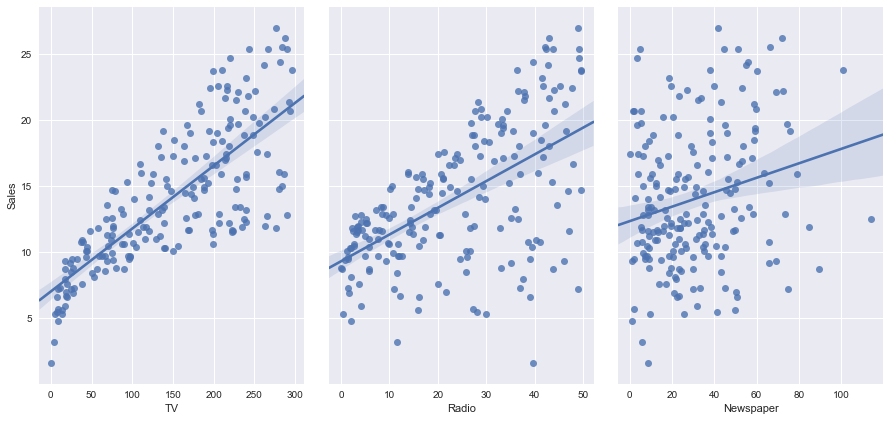

In [49]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')

In [50]:
# Se observan tres gráficas que relaciónan la información del dataset. Todos los datos se analizan vs las ventas.
# 1. Televisión Vs Ventas; 2. Radio Vs Ventas 3. Periodicos Vs Ventas

In [51]:
# Crear una lista de python con las etiquetas
feature_cols = ['TV', 'Radio', 'Newspaper']

# Ahora, se pueden usar las listas para seleccionar los datos 
X = data[feature_cols]

X = data[['TV', 'Radio', 'Newspaper']]

# Se imprimen las primeras cinco filas 
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [52]:
# Analizar el temaño de X 
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [53]:
# Seleccionar la columna de Ventas desde la matriz de datos 
# select a Series from the DataFrame
y = data['Sales']

# Otra forma equivalente de obtener la columna de las ventas es ..
y = data.Sales

# Imprimir las primeras cinco filas 
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [54]:
# verificar el tamaña de Y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200L,)


In [55]:
# import  
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150L,)
(50L,)


In [57]:
# Por defecto se toman 75% de los datos para entrenamiento y el 25 % para validación ..

In [58]:
# Importar el modelo ! 
from sklearn.linear_model import LinearRegression

# Se declara linreg como el llamado al modelo (instantiate)
linreg = LinearRegression()

# Asignar los datos de entrenamiento al modelo !! 
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# Imprimir los coeficientes calculados y la intercción 
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [60]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

El resultado del modelo es:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y = 2.8769 + 0.04656*TV + 0.1791*Radio + 0.003450*Newspaper$

# Ya se pueden hacer predicciones !

In [62]:
# Se genera un vector (y_pred) de valores obtenidos con el modelo de predicción 
y_pred = linreg.predict(X_test)

In [63]:
print y_pred

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


In [64]:
# Se imprimen solo unos valores de los valores de prueba empleados ..
print X_test.head()

        TV  Radio  Newspaper
59   210.8   49.6       37.7
41   202.5   22.3       31.6
35    95.7    1.4        7.4
103  280.2   10.1       21.4
185  253.8   21.3       30.0


In [65]:
# Se importa la libreria numpy
import numpy as np

Se evaluaran tres metricas para analizar los errores : 
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)

1. Calculo del error Medio Absoluto ó Mean Absolute Error (MAE) 

$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

In [69]:
from sklearn import metrics
print ("Error promedio absoluto: ")
print (metrics.mean_absolute_error(y_test, y_pred))


Error promedio absoluto: 
1.06689170826


2. Calculo del error medio cuadratico ó Mean Squared Error (MSE) ó Varianza !

$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

In [70]:
print ("Error cuadratico medio o Varianza:")
print(metrics.mean_squared_error(y_test, y_pred))

Error cuadratico medio o Varianza:
1.97304562023


3. Calculo de error Root Mean Squared Error (RMSE) ó Desviación estándar

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

In [36]:
print ("Raiz del error cuadrativo medio:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Raiz del error cuadrativo medio:
1.40465142303


In [37]:
# Ahora se grafican los valores Y de prueba Vs los valores Y obtenidos con la predicción

In [38]:
import matplotlib.pyplot as plt

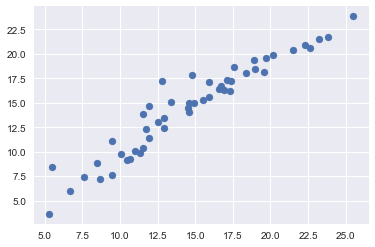

In [39]:
plt.scatter(y_test, y_pred , label='Fitted line')

In [40]:
# Se observa de la figura, la linealidad de los resultados